In [5]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
from google.colab import files
uploaded = files.upload()



Saving gender_submission.csv to gender_submission (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [12]:
!cp gender_submission.csv /content/drive/MyDrive/
!cp test.csv /content/drive/MyDrive/


In [13]:
# Mount Google Drive
from google.colab import drive, files
import os
import pandas as pd

drive.mount('/content/drive')

# Folder in Drive
base_path = "/content/drive/MyDrive/Titanic/"
os.makedirs(base_path, exist_ok=True)

# Required files
required_files = ["gender_submission.csv", "test.csv", "train.csv"]

# Check missing files and upload if needed
missing = [f for f in required_files if not os.path.exists(os.path.join(base_path, f))]
if missing:
    print("Missing files:", missing)
    uploaded = files.upload()
    for fname, content in uploaded.items():
        with open(os.path.join(base_path, fname), "wb") as f:
            f.write(content)

# Load DataFrames
gender_df = pd.read_csv(base_path + "gender_submission.csv") if os.path.exists(base_path + "gender_submission.csv") else None
test_df   = pd.read_csv(base_path + "test.csv") if os.path.exists(base_path + "test.csv") else None
train_df  = pd.read_csv(base_path + "train.csv") if os.path.exists(base_path + "train.csv") else None

# Preview
if gender_df is not None: print("Gender DF:\n", gender_df.head())
if test_df is not None: print("Test DF:\n", test_df.head())
if train_df is not None: print("Train DF:\n", train_df.head())


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Missing files: ['gender_submission.csv', 'test.csv', 'train.csv']


Saving gender_submission.csv to gender_submission (2).csv
Saving test.csv to test (2).csv
Saving train.csv to train (2).csv


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Load Dataset

In [16]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
gender_df = pd.read_csv("gender_submission.csv")

train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Data Cleaning

In [17]:
train_df.info()
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Handle missing values

In [18]:
# Fill missing 'Age' with median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

# Fill missing 'Embarked' with mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing 'Cabin' with 'Unknown'
train_df['Cabin'].fillna('Unknown', inplace=True)

# Verify no missing data
train_df.isnull().sum()


/tmp/ipython-input-3695668667.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Age'].fillna(train_df['Age'].median(), inplace=True)
/tmp/ipython-input-3695668667.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


Exploratory Data Analysis (EDA)

a. Overview of Data

In [19]:
train_df.describe()
train_df['Survived'].value_counts()


,count
Survived,
0,549
1,342


b. Survival Count Plot

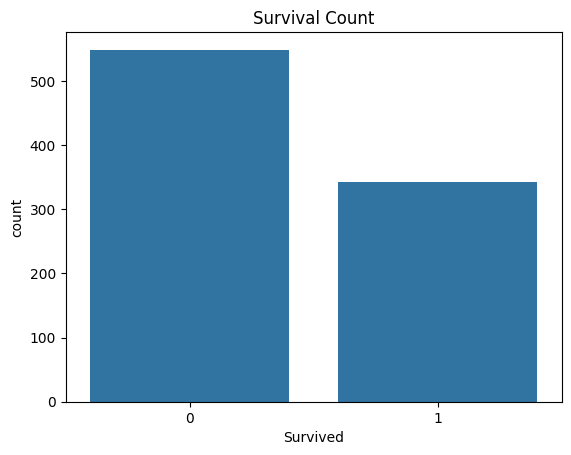

In [20]:
sns.countplot(x='Survived', data=train_df)
plt.title("Survival Count")
plt.show()


c. Gender vs Survival

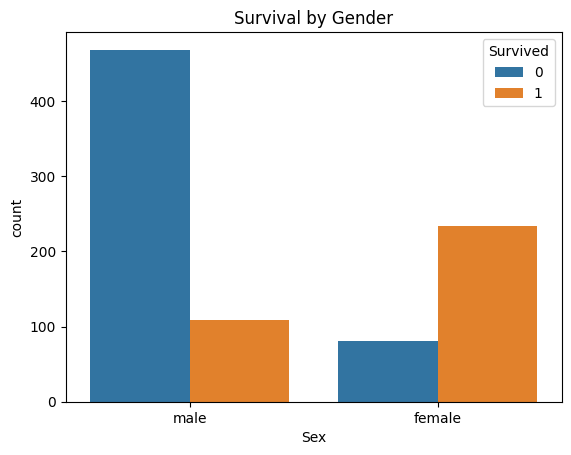

In [21]:
sns.countplot(x='Sex', hue='Survived', data=train_df)
plt.title("Survival by Gender")
plt.show()


d.Class vs Survival

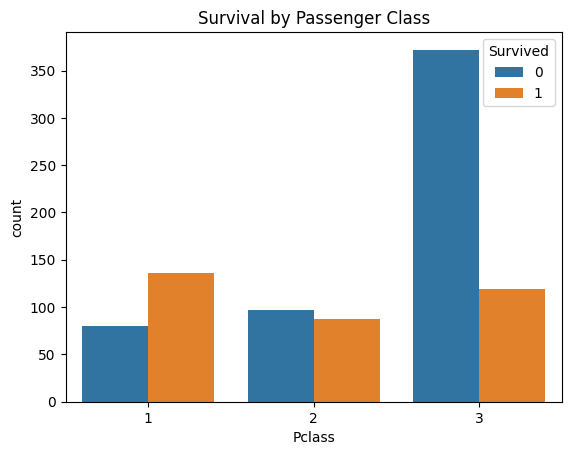

In [22]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)
plt.title("Survival by Passenger Class")
plt.show()


e.Age Distribution

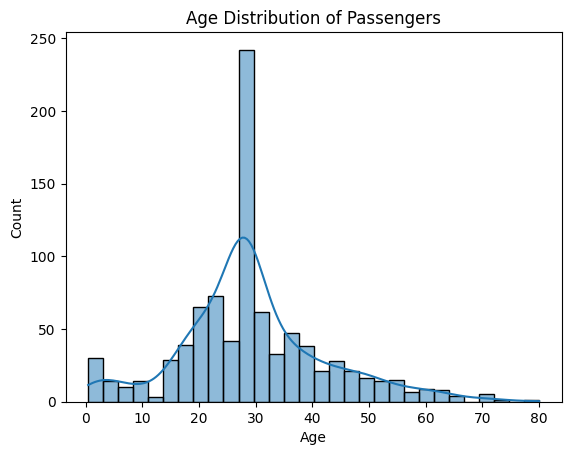

In [24]:
sns.histplot(train_df['Age'], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


f. Age vs Survival

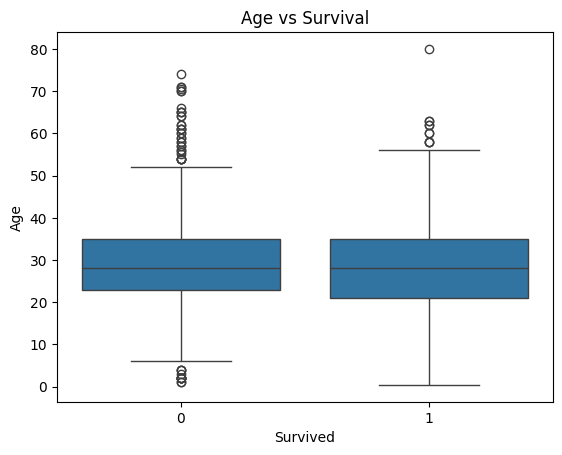

In [25]:
sns.boxplot(x='Survived', y='Age', data=train_df)
plt.title("Age vs Survival")
plt.show()


Correlation Analysis

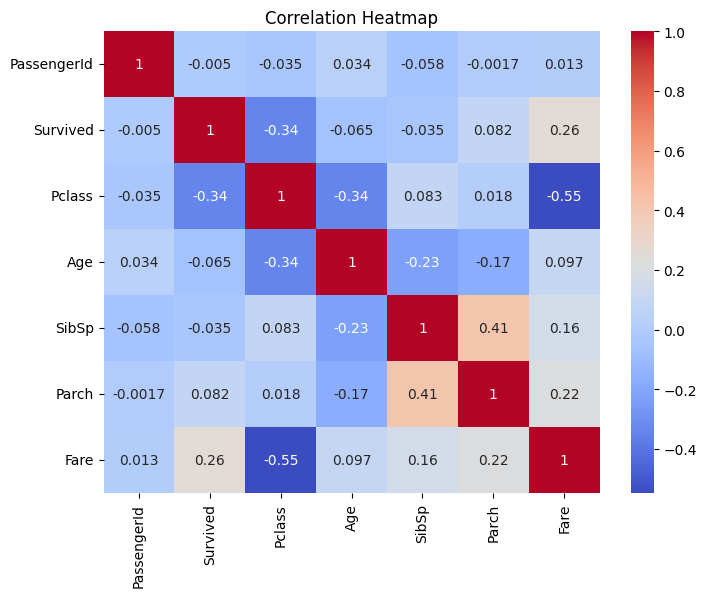

In [26]:
corr = train_df.corr(numeric_only=True)
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


Subplots for Titanic EDA

/tmp/ipython-input-2330683614.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_df, palette='coolwarm')


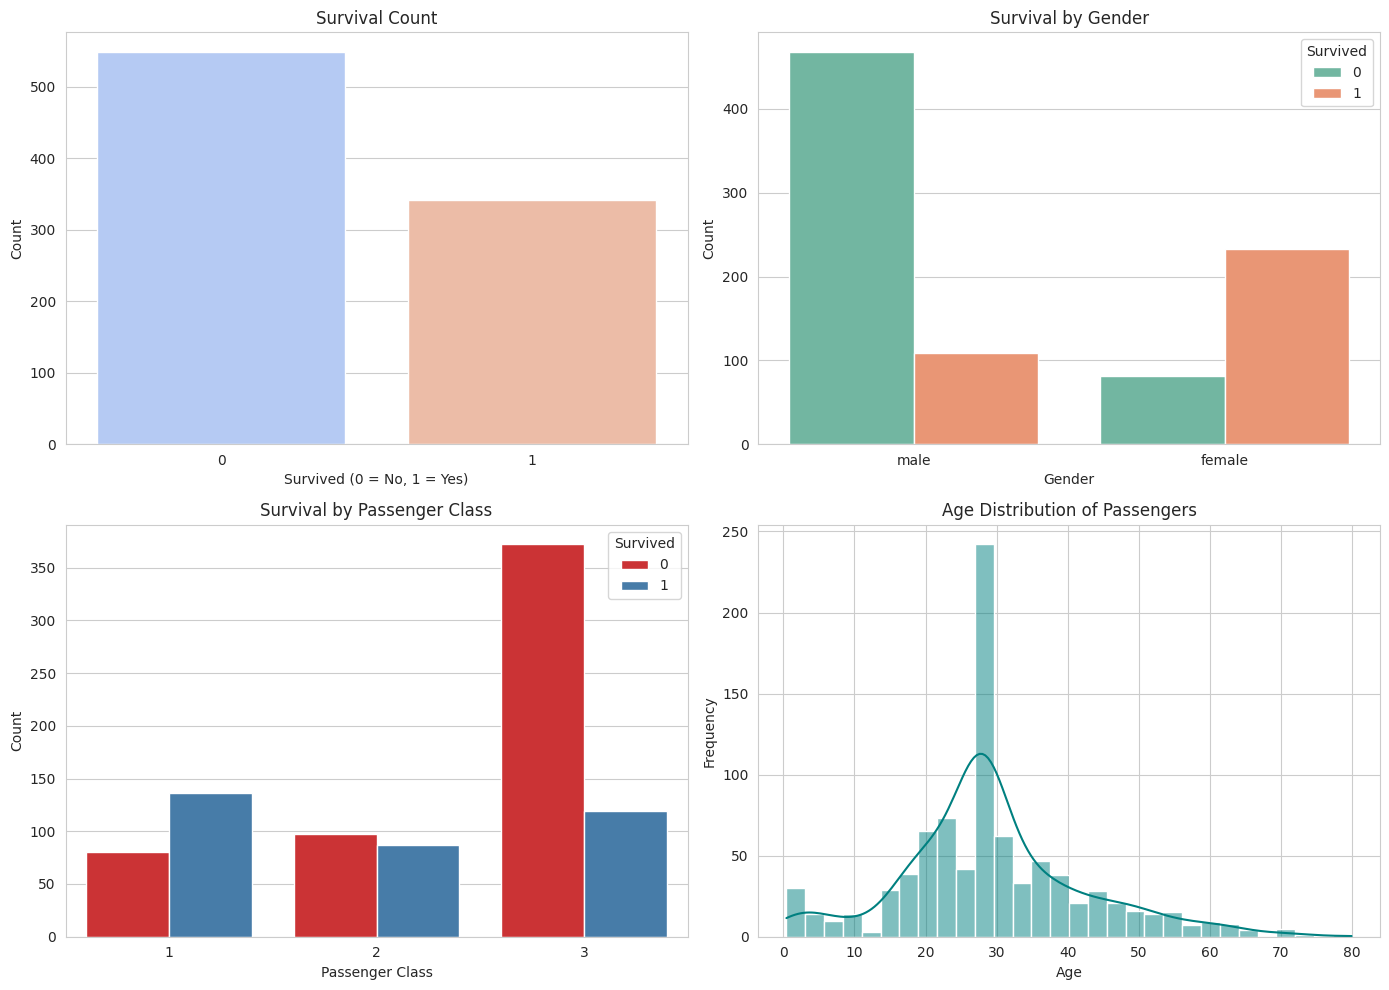

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size and style
plt.figure(figsize=(14,10))
sns.set_style("whitegrid")

# --- Plot 1: Survival Count ---
plt.subplot(2, 2, 1)
sns.countplot(x='Survived', data=train_df, palette='coolwarm')
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

# --- Plot 2: Survival by Gender ---
plt.subplot(2, 2, 2)
sns.countplot(x='Sex', hue='Survived', data=train_df, palette='Set2')
plt.title("Survival by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")

# --- Plot 3: Survival by Passenger Class ---
plt.subplot(2, 2, 3)
sns.countplot(x='Pclass', hue='Survived', data=train_df, palette='Set1')
plt.title("Survival by Passenger Class")
plt.xlabel("Passenger Class")
plt.ylabel("Count")

# --- Plot 4: Age Distribution ---
plt.subplot(2, 2, 4)
sns.histplot(train_df['Age'], bins=30, kde=True, color='teal')
plt.title("Age Distribution of Passengers")
plt.xlabel("Age")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Insights & Patterns

# Insights:
# 1. Females had a higher survival rate than males.
# 2. Passengers in 1st class survived more than those in 3rd class.
# 3. Younger passengers had slightly higher survival chances.
